In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi

## Decomposition d'un signal avec un sinus

En partant de l'égalité
$$
e^{-j 2 \pi f t} = \cos{- 2 \pi f t} + j  \sin{- 2 \pi f t}
$$
On peut réécrire la transformée de Fourier
$$
X(f) = \int_{-\infty}^{+\infty}{x(t)\cdot (\cos{- 2 \pi f t} + j  \sin{- 2 \pi f t})} =  \int_{-\infty}^{+\infty}{x(t)\cdot (\cos{- 2 \pi f t})} + j  \int_{-\infty}^{+\infty}{x(t)\cdot  \sin{- 2 \pi f t}}
$$

Essayons de voir ce qui se passe avec le second terme. 
Dans sa version échantillonnée, on obtient :
$$
X[k] = \sum_{n=0}^{N-1}{x[n]\cdot \sin(-2 \pi f \frac{n}{N})}
$$
On va décomposer le développement en harmoniques :

In [3]:
N=64
n=np.arange(N)

In [34]:
f=2.0
x=np.sin(2*pi*f*n/N) # Signal sinusoïdal de fréquence minimum (1), identique à la fondamentale
k=1
s1=np.sin(2*pi*k*n/N) # Fondamentale
p1=s1*x
sum1=np.cumsum(p1)/N

La somme finit à 4.6241222656506764e-17


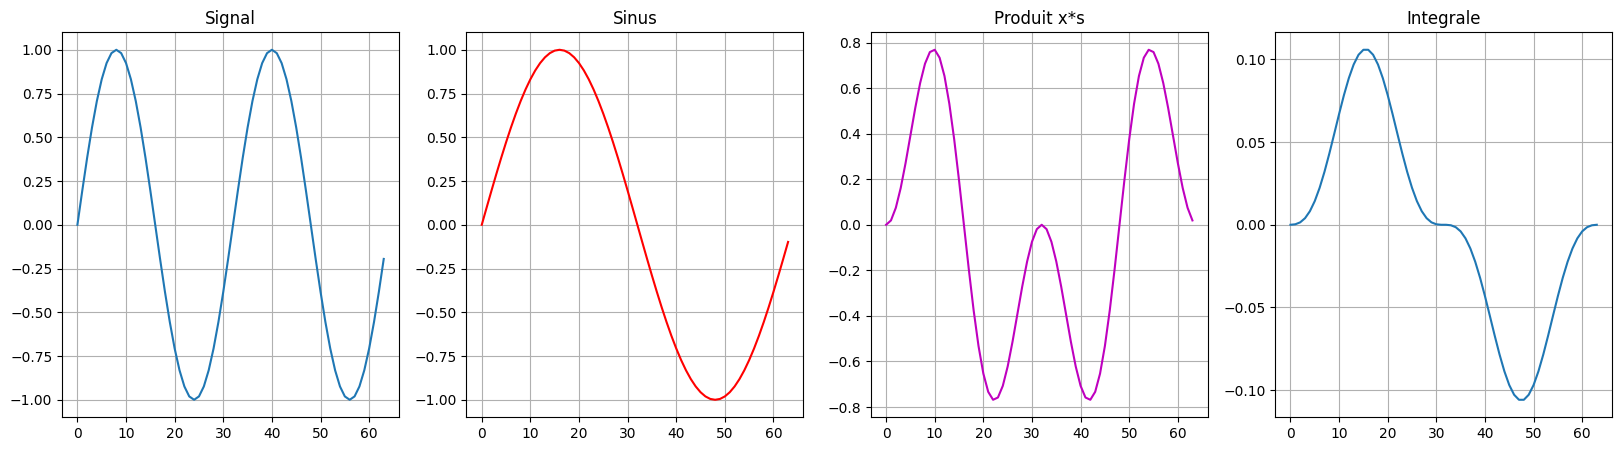

In [35]:
F=4
fig, ax=plt.subplots(1,F, figsize=(20,5))
ax[0].plot(n,x)
ax[0].set_title('Signal')
ax[1].plot(n,s1,'r')
ax[1].set_title('Sinus')
ax[2].plot(n,p1,'m')
ax[2].set_title('Produit x*s')
ax[3].plot(n,sum1)
ax[3].set_title('Integrale')

for i in range(F):
    ax[i].grid()
print(f"La somme finit à {sum1[-1]}")

In [28]:
# Calcul de la somme du produit pour un signal de fréquence f et une harmonique k
def getSum(f,k):
    x=np.sin(2*pi*f*n/N)
    s1=np.sin(2*pi*k*n/N)
    p1=s1*x
    sum1=np.cumsum(p1)/N
    return sum1[-1]

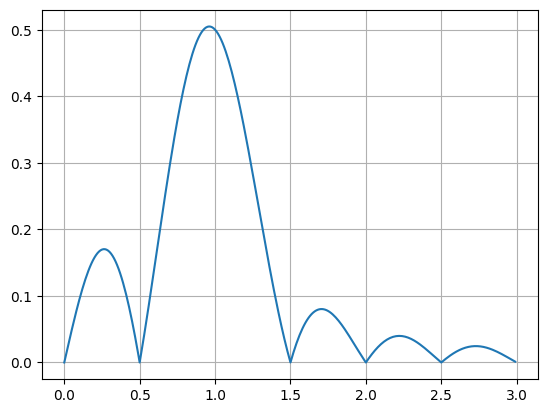

In [29]:
rf=np.arange(0,3,0.01)
R=len(rf)
h=1
sums=np.empty(R)
for i in range(R):
    sums[i]=getSum(rf[i],h)
    
plt.plot(rf,np.abs(sums))
plt.grid()
    

## Retour à l'origine

Si on remplace la fonction $\sin(2*pi*f*n)$ par $e^{-j2\pi f t}$

In [30]:
def getSumC(f,k):
    x=np.sin(2*pi*f*n/N)
    s1=np.exp(-1j*2*pi*k*n/N)
    p1=s1*x
    sum1=np.cumsum(p1)/N
    return sum1[-1]

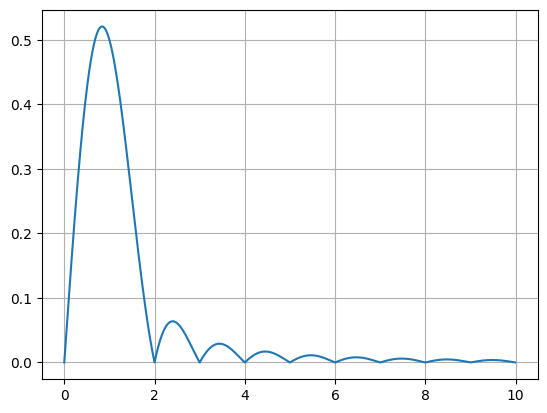

In [31]:
rf=np.arange(0,10,0.01)
R=len(rf)
h=1
sums=np.empty(R, dtype=complex)
for i in range(R):
    sums[i]=getSumC(h,rf[i])
    
plt.plot(rf,np.abs(sums))
plt.grid()

C:\Users\marc.nicoller\AppData\Local\Temp\ipykernel_26680\297273495.py:2: RuntimeWarning: invalid value encountered in divide
  sf=np.sin(2*pi*rf)/(2*pi*rf)


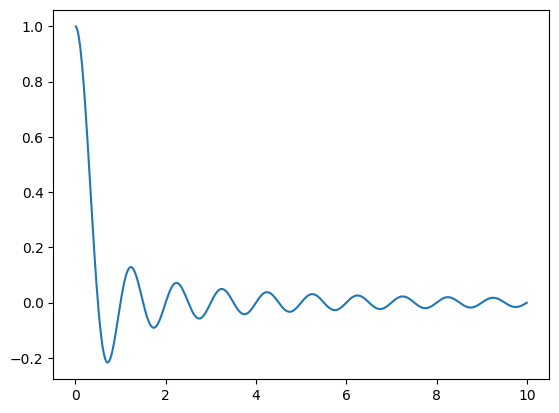

In [25]:
sf=np.abs(np.sinc(rf))
sf=np.sin(2*pi*rf)/(2*pi*rf)
plt.plot(rf,sf)